# Testing Aigents Cognitive Distortions Analysis API

Resources:
- Basic paper: https://www.pnas.org/doi/10.1073/pnas.2102061118
- Descriptions: https://t.me/collectivei/5401
- All emojis: https://emojidb.org/language-emojis
- Related: https://github.com/YisroelLen/Cognitive-Distortions-LFS


## Rendering distortions
- 😱🌋🌊🌪☄️📛Catastrophizing: Exaggerating the importance of negative events 
- ⚖️⚪️⚫️☯️Dichotomous Reasoning: Thinking that an inherently continuous situation can only fall into two categories 
- 👎💩Disqualifying the Positive: Unreasonably discounting positive experiences
- 💔💖💓🖤Emotional Reasoning: Thinking that something is true based on how one feels, ignoring the evidence to the contrary
- 🔮Fortune-telling: Making predictions, usually negative ones, about the future 
- 🏷Labeling and mislabeling: Labeling yourself or others while discounting evidence that could lead to less disastrous conclusions
- 🔬🔭🔎Magnification and Minimization: Magnifying negative aspects or minimizing positive aspects
- 🙅Mental Filtering: Paying too much attention to negative details instead of the whole picture
- 😎🧙‍♂️🧘‍♂️👳🏽Mindreading: Believing you know what others are thinking
- 📉Overgeneralizing: Making sweeping negative conclusions based on a few examples
- 🙇🏼🤦🏼Personalizing: Believing others are behaving negatively because of oneself, without considering more plausible or external explanations for behavior
- 📌🗜🚫Should statements: Having a fixed idea on how you and/or others should behave
- 🎭😊😟🤼‍♂️🤼‍♀️ Contradictive statements: Opposition of positive and negative references to the same situation or context
- 😊Positive statements: Emotionally positive sentiment about situation or context 
- 😟Negative statements: Emotionally negtative sentiment about situation or context 
- 😳Rude statements: Emotionally rude (obscene vocabulary) expressions about situation or context
    
Source: https://emojidb.org/

## Distortions in Russian (Google Translated)

- 😱🌋🌊🌪☄️📛Катастрофизация: преувеличение важности негативных событий.
- ⚖️⚪️⚫️☯️Дихотомическое мышление: мысль о том, что непрерывная по своей сути ситуация может делиться только на две категории.
- 👎💩Дисквалификация позитива: необоснованное обесценивание позитивного опыта.
- 💔💖💓🖤Эмоциональное мышление: думать, что что-то верно, основываясь на своих чувствах, игнорируя доказательства обратного.
- 🔮Гадание: предсказания будущего, обычно негативные.
- 🏷Навешивание ярлыков и неправильные ярлыки: навешивание ярлыков на себя и других, при этом игнорируя доказательства, которые могли бы привести к менее катастрофическим выводам.
- 🔬🔭🔎Увеличение и минимизация: усиление отрицательных аспектов или минимизация положительных аспектов.
- 🙅Ментальная фильтрация: слишком много внимания уделяется негативным деталям, а не всей картине.
- 😎🧙‍♂️🧘‍♂️👳🏽Чтение мыслей: вера в то, что вы знаете, о чем думают другие.
- 📉Чрезмерное обобщение: делать радикальные отрицательные выводы на основе нескольких примеров.
- 🤦🙇🏼Персонализация: убеждение, что другие ведут себя негативно из-за себя, без рассмотрения более правдоподобных или внешних объяснений поведения.
- 📌🗜🚫Утверждения о том, что следует: наличие фиксированного представления о том, как вам и/или другим следует вести себя.
- 🎭Противоречивые утверждения: Противопоставление положительных и отрицательных упоминаний об одной и той же ситуации или контексте.
- 😊Позитивные утверждения: эмоционально позитивное отношение к ситуации или контексту.
- 😟Негативные утверждения: эмоционально негативное мнение о ситуации или контексте.
- 😳Грубые высказывания: эмоционально грубые (нецензурная лексика) выражения о ситуации или контексте.


In [1]:
import os, sys, math
cwd = os.getcwd()
project_path = cwd[:cwd.find('pygents')+7]
if project_path not in sys.path: sys.path.append(project_path)
os.chdir(project_path) 

import datetime as dt
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup

if 'pygents.aigents_api' in sys.modules:
    del sys.modules['pygents.aigents_api']
if 'pygents.util' in sys.modules:
    del sys.modules['pygents.util']

from pygents.aigents_api import AigentsSentiment, PygentsSentiment, TextMetrics
from pygents.util import vector_proximity


def language_metrics(lang,metrics_list):
    metrics = {}
    for m in metrics_list:
        metrics[m] = './data/dict/' + lang + '/' + m + '.txt'
    return metrics

        
p = PygentsSentiment('./data/dict/en/positive.txt',
                     './data/dict/en/negative.txt',debug=True)
a = TextMetrics(language_metrics('en',['catastrophizing','dichotomous-reasoning']),debug=True)
s = TextMetrics(language_metrics('en',['positive','negative']),debug=True)

print(a.gram_arity)
print(s.gram_arity)


4
6


In [2]:
a.metrics


{'catastrophizing': {('will', 'be', 'a', 'catastrophe'),
  ('will', 'be', 'a', 'disaster'),
  ('will', 'be', 'horrible'),
  ('will', 'be', 'impossible'),
  ('will', 'be', 'terrible'),
  ('will', 'end'),
  ('will', 'fail'),
  ('will', 'go', 'wrong'),
  ('will', 'never', 'end'),
  ('will', 'not', 'end'),
  ('will', 'not', 'happen')},
 'dichotomous-reasoning': {('all',),
  ('always',),
  ('black', 'or', 'white'),
  ('either', 'or'),
  ('ever',),
  ('every',),
  ('everybody',),
  ('everyone',),
  ('everything',),
  ('everywhere',),
  ('neither',),
  ('never',),
  ('no', 'one'),
  ('nobody',),
  ('nor',),
  ('not', 'a', 'single'),
  ('nothing',),
  ('nowhere',),
  ('only',),
  ('perfect',),
  ('the', 'best'),
  ('the', 'worst'),
  ('worthless',)}}

In [3]:
for m in s.metrics:
    ngrams = s.metrics[m]
    for n in ngrams:
        if len(n) > 4:
            print(n)


('feel', 'like', 'a', 'million', 'dollars')
('revelation', 'of', 'saint', 'john', 'the', 'divine')
('respiratory', 'distress', 'syndrome', 'of', 'the', 'newborn')
('too', 'big', 'for', "one's", 'breeches')
('pull', 'a', 'fast', 'one', 'on')


In [4]:
texts = ['good news','bad news','good bad news','good and pleasant news about bad things','good bad cloud','empty spaces']
for t in texts:
    sentiment = p.get_sentiment(t)
    metrics = s.get_sentiment_words(t)
    assert sentiment[1] == (metrics['positive'] if 'positive' in metrics else 0) 
    assert sentiment[2] == (-metrics['negative'] if 'negative' in metrics else 0) 
    print(sentiment,metrics,t)


(0.85, 0.85, -0.0, 0.0, 2, 1) {'positive': 0.85} good news
(-0.85, 0.0, -0.85, 0.0, 2, 1) {'negative': 0.85} bad news
(0.0, 0.77, -0.77, 0.77, 3, 1) {'positive': 0.77, 'negative': 0.77, 'contradictive': 0.77} good bad news
(0.14, 0.74, -0.59, 0.66, 7, 1) {'positive': 0.74, 'negative': 0.59, 'contradictive': 0.66} good and pleasant news about bad things
(0.0, 0.77, -0.77, 0.77, 3, 1) {'positive': 0.77, 'negative': 0.77, 'contradictive': 0.77} good bad cloud
(0.0, 0.0, -0.0, 0.0, 2, 1) {} empty spaces


In [5]:
texts = ['empty spaces',
         'i will fail',
         'i will fail without of glass of water',
         'i will fail without of glass of water and bottle of whiskey',
         'i will fail without of glass of water and bottle of whiskey every day',
         'never ever',
         'damn cold']
for t in texts:
    metrics = a.get_sentiment_words(t)
    print(metrics,t)


{} empty spaces
{'catastrophizing': 0.92} i will fail
{'catastrophizing': 0.71} i will fail without of glass of water
{'catastrophizing': 0.62} i will fail without of glass of water and bottle of whiskey
{'catastrophizing': 0.59, 'dichotomous-reasoning': 0.46} i will fail without of glass of water and bottle of whiskey every day
{'dichotomous-reasoning': 1.0} never ever
{} damn cold


In [6]:
labels = ['positive','negative','rude',
'catastrophizing','dichotomous-reasoning','disqualifying-positive','emotional-reasoning','fortune-telling',
'labeling','magnification','mental-filtering','mindreading','overgeneralizing','personalizing','should-statement']
l = TextMetrics(language_metrics('en',labels),debug=False)
for t in texts:
    metrics = l.get_sentiment_words(t)
    print(metrics,t)


{} empty spaces
{'catastrophizing': 0.92} i will fail
{'catastrophizing': 0.71} i will fail without of glass of water
{'catastrophizing': 0.62} i will fail without of glass of water and bottle of whiskey
{'catastrophizing': 0.59, 'dichotomous-reasoning': 0.46} i will fail without of glass of water and bottle of whiskey every day
{'negative': 0.85, 'dichotomous-reasoning': 1.0} never ever
{'negative': 1.0, 'rude': 0.85} damn cold


In [7]:
text = ''
with open('./data/corpora/English/fishing/sample1.txt') as f:
    lines = f.readlines()
for line in lines:
    text += line
lists = {}
metrics = l.get_sentiment_words(text,lists,debug=False)
print(lists)
metrics

{'positive': [('good', 'for', 'you'), ('come', 'to'), ('thank', 'you'), ('due',), ('respect',), ('know',), ('honour',), ('highly',), ('reputable',), ('master',), ('truth',), ('just',), ('security',), ('contain',), ('know',), ('just',), ('know',), ('sincerely',), ('humble',), ('highly',), ('trust',), ('account',), ('please',), ('consider',), ('possible',), ('best',)], 'negative': [('does', 'not'), ('get', 'back'), ('have',), ('not',), ('against',), ('sad',), ('mysteriously',), ('death',), ('have',), ('died',), ('death',), ('have',), ("don't",), ('have',), ('suffered',), ('incessant',), ('crisis',), ('death',), ('sorrow',)], 'personalizing': [('because', 'i')], 'dichotomous-reasoning': [('nor',), ('only',)], 'rude': [('god',)], 'overgeneralizing': [('completely',)], 'magnification': [('best',)]}


{'positive': 0.45,
 'negative': 0.38,
 'personalizing': 0.08,
 'dichotomous-reasoning': 0.08,
 'rude': 0.05,
 'overgeneralizing': 0.05,
 'magnification': 0.05,
 'contradictive': 0.41}

## Representing Distortions 

In [8]:
psy_metrics = {'en':[
('😊','positive','Positive statements','Emotionally positive sentiment about situation or context'),
('😟','negative','Negative statements','Emotionally negtative sentiment about situation or context'),
('🎭','contradictive','Contradictive statements','Opposition of positive and negative references to the same situation or context'),
('😳','rude','Rude statements','Emotionally rude (obscene vocabulary) expressions about situation or context'),
('😱','catastrophizing','Catastrophizing','Exaggerating the importance of negative events'),
('⚖️','dichotomous-reasoning','Dichotomous Reasoning','Thinking that an inherently continuous situation can only fall into two categories'),
('👎','disqualifying-positive','Disqualifying the Positive','Unreasonably discounting positive experiences'),
('💔','emotional-reasoning','Emotional Reasoning','Thinking that something is true based on how one feels, ignoring the evidence to the contrary'),
('🔮','fortune-telling','Fortune-telling','Making predictions, usually negative ones, about the future'),
('🏷','labeling','Labeling and mislabeling','Labeling yourself or others while discounting evidence that could lead to less disastrous conclusions'),
('🔬','magnification','Magnification and Minimization','Magnifying negative aspects or minimizing positive aspects'),
('🙅','mental-filtering','Mental Filtering','Paying too much attention to negative details instead of the whole picture'),
('😎','mindreading','Mindreading','Believing you know what others are thinking'),
('📉','overgeneralizing','Overgeneralizing','Making sweeping negative conclusions based on a few examples'),
('🙇🏼','personalizing','Personalizing','Believing others are behaving negatively because of oneself, without considering more plausible or external explanations for behavior'),
('📌','should-statement','Should statements','Having a fixed idea on how you and/or others should behave')],
'ru':[
('😊','positive','Позитивные высказывания','Эмоционально позитивное отношение к ситуации или контексту'),
('😟','negative','Негативные высказывания','Эмоционально негативное мнение о ситуации или контексте'),
('🎭','contradictive','Противоречивые высказывания','Противопоставление положительных и отрицательных упоминаний об одной и той же ситуации или контексте'),
('😳','rude','Грубые высказывания','Эмоционально грубые (нецензурная лексика) выражения о ситуации или контексте'),
('😱','catastrophizing','Катастрофизация','Преувеличение важности негативных событий'),
('⚖️','dichotomous-reasoning','Дихотомическое мышление','Мысль о том, что непрерывная по своей сути ситуация может делиться только на две категории'),
('👎','disqualifying-positive','Дисквалификация позитива','Необоснованное обесценивание позитивного опыта'),
('💔','emotional-reasoning','Эмоциональное мышление','Думать, что что-то верно, основываясь на своих чувствах, игнорируя доказательства обратного'),
('🔮','fortune-telling','Гадание','Предсказания будущего, обычно негативные'),
('🏷','labeling','Навешивание ярлыков','Навешивание ярлыков на себя и других, при этом игнорируя доказательства, которые могли бы привести к менее катастрофическим выводам'),
('🔬','magnification','Преувеличение и преуменьшение','Усиление отрицательных аспектов или минимизация положительных аспектов'),
('🙅','mental-filtering','Ментальная фильтрация','Слишком много внимания уделяется негативным деталям, а не всей картине'),
('😎','mindreading','Чтение мыслей','Вера в то, что вы знаете, о чем думают другие'),
('📉','overgeneralizing','Чрезмерное обобщение','Делать радикальные отрицательные выводы на основе нескольких примеров'),
('🙇🏼','personalizing','Персонализация','Убеждение, что другие ведут себя негативно из-за себя, без рассмотрения более правдоподобных или внешних объяснений поведения'),
('📌','should-statement','Предписывание','Наличие фиксированного представления о том, как вам и/или другим следует вести себя')]}


def psy_metric_lists(metrics,lang='en'):
    psy_lang_metrics = psy_metrics[lang]
    keys = []
    vals = []
    for m in psy_lang_metrics:
        if m[1] in metrics:
            keys.append(m[2])
            vals.append(metrics[m[1]])
    return (keys, vals)
    
def psy_metric_texts(metrics,lang='en'):
    psy_lang_metrics = psy_metrics[lang]
    texts = []
    for m in psy_lang_metrics:
        if m[1] in metrics:
            s = m[0]
            t = m[2]
            v = metrics[m[1]]
            s = s+s+s+s if v >= 0.75 else s+s+s if v > 0.5 else s+s if v > 0.25 else s 
            texts.append(s+t)
    return texts


{'positive': [('good', 'for', 'you'), ('come', 'to'), ('thank', 'you'), ('due',), ('respect',), ('know',), ('honour',), ('highly',), ('reputable',), ('master',), ('truth',), ('just',), ('security',), ('contain',), ('know',), ('just',), ('know',), ('sincerely',), ('humble',), ('highly',), ('trust',), ('account',), ('please',), ('consider',), ('possible',), ('best',)], 'negative': [('does', 'not'), ('get', 'back'), ('have',), ('not',), ('against',), ('sad',), ('mysteriously',), ('death',), ('have',), ('died',), ('death',), ('have',), ("don't",), ('have',), ('suffered',), ('incessant',), ('crisis',), ('death',), ('sorrow',)], 'personalizing': [('because', 'i')], 'dichotomous-reasoning': [('nor',), ('only',)], 'rude': [('god',)], 'overgeneralizing': [('completely',)], 'magnification': [('best',)]}
(['Positive statements', 'Negative statements', 'Contradictive statements', 'Rude statements', 'Dichotomous Reasoning', 'Magnification and Minimization', 'Overgeneralizing', 'Personalizing'], [0.

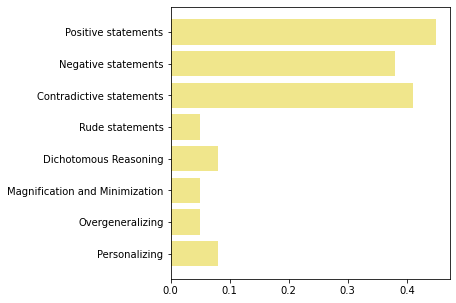

In [9]:
text = ''
with open('./data/corpora/English/fishing/sample1.txt') as f:
    lines = f.readlines()
for line in lines:
    text += line
lists = {}
metrics = l.get_sentiment_words(text,lists,debug=False)
print(lists)
metric_lists = psy_metric_lists(metrics)
print(metric_lists)
print()
metric_texts = psy_metric_texts(metrics)
print('\n'.join(metric_texts))
plt.rcParams["figure.figsize"] = (5,5)
bars = plt.barh(metric_lists[0], metric_lists[1], color='khaki')
plt.gca().invert_yaxis()
plt.show()

(['Позитивные высказывания', 'Негативные высказывания', 'Противоречивые высказывания', 'Грубые высказывания', 'Дихотомическое мышление', 'Преувеличение и преуменьшение', 'Чрезмерное обобщение', 'Персонализация'], [0.45, 0.38, 0.41, 0.05, 0.08, 0.05, 0.05, 0.08])

😊😊Позитивные высказывания
😟😟Негативные высказывания
🎭🎭Противоречивые высказывания
😳Грубые высказывания
⚖️Дихотомическое мышление
🔬Преувеличение и преуменьшение
📉Чрезмерное обобщение
🙇🏼Персонализация


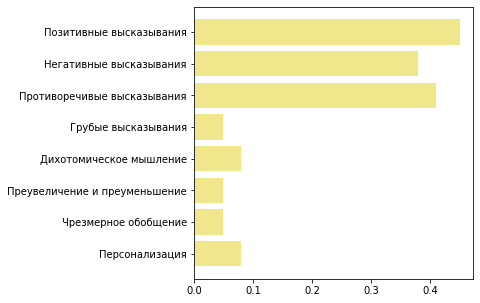

In [10]:
metric_lists = psy_metric_lists(metrics,lang='ru')
print(metric_lists)
print()
metric_texts = psy_metric_texts(metrics,lang='ru')
print('\n'.join(metric_texts))
plt.rcParams["figure.figsize"] = (5,5)
bars = plt.barh(metric_lists[0], metric_lists[1], color='khaki')
plt.gca().invert_yaxis()
plt.show()

😊😊Positive statements, 😟😟Negative statements, 🎭🎭Contradictive statements, ⚖️Dichotomous Reasoning, 🏷Labeling and mislabeling, 📉Overgeneralizing


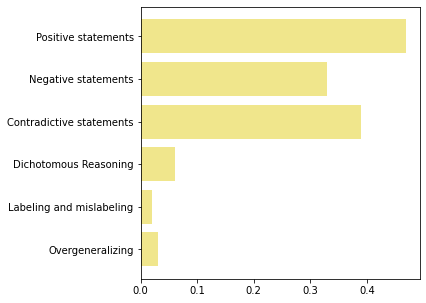

In [11]:
link = "https://www.wired.com/story/fast-forward-ai-powerful-secretive/"
html = requests.get(link).text  
soup = BeautifulSoup(html)
text = soup.get_text()
text
lists = {}
metrics = l.get_sentiment_words(text,lists,debug=False)
metric_texts = psy_metric_texts(metrics)
print(', '.join(metric_texts))
metric_lists = psy_metric_lists(metrics)
bars = plt.barh(metric_lists[0], metric_lists[1], color='khaki')
plt.gca().invert_yaxis()


😊😊Positive statements
😟😟Negative statements
🎭🎭Contradictive statements
😳Rude statements
⚖️Dichotomous Reasoning
🙇🏼Personalizing
📌Should statements


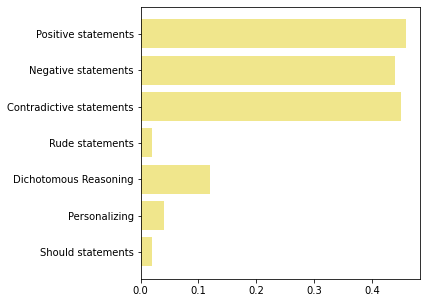

In [12]:
link = "https://futurism.com/ai-expert-bomb-datacenters"
html = requests.get(link).text  
soup = BeautifulSoup(html)
text = soup.get_text()
text
lists = {}
metrics = l.get_sentiment_words(text,lists,debug=False)
metric_texts = psy_metric_texts(metrics)
print('\n'.join(metric_texts))
metric_lists = psy_metric_lists(metrics)
bars = plt.barh(metric_lists[0], metric_lists[1], color='khaki')
plt.gca().invert_yaxis()

In [13]:
#TODO emotion (overall)


